In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve, auc, precision_recall_curve


In [78]:
data = load_breast_cancer()
X = data.data
y = data.target

In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
df = pd.DataFrame(data=np.c_[X,y], columns=np.append(data.feature_names, ["target"]))
display(df.head())


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [81]:
#Splitting data
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [82]:
def evaluate(y_true, y_pred, y_prob, model_name):

  print(f"Model: {model_name}\n")

  print("Confusion Matrix:")
  print(confusion_matrix(y_true, y_pred))
  print("\n")
  #formatting and constructing confusion matrix

  print("Classification Report:")
  print(classification_report(y_true, y_pred))
  #prints classification report


  if y_prob is not None:
    print("AUC Score:", roc_auc_score(y_true, y_prob))
    print("\n")

In [83]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, solver='saga')
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:,1]

evaluate(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")

Model: Logistic Regression

Confusion Matrix:
[[ 62   1]
 [  2 106]]


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

AUC Score: 0.9980893592004703




In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:,1]

evaluate(y_test, y_pred_knn, y_prob_knn, "K Nearest Neighbors")

Model: K Nearest Neighbors

Confusion Matrix:
[[ 59   4]
 [  3 105]]


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

AUC Score: 0.9776601998824221




In [85]:
from sklearn.svm import SVC
#good for clearly segregrated data

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:,1]

evaluate(y_test, y_pred_svm, y_prob_svm, "SVM")

Model: SVM

Confusion Matrix:
[[ 61   2]
 [  3 105]]


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

AUC Score: 0.9964726631393297




In [86]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:,1]

evaluate(y_test, y_pred_dt, y_prob_dt, "Decision Tree")

Model: Decision Tree

Confusion Matrix:
[[ 60   3]
 [  7 101]]


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

AUC Score: 0.9437830687830687




In [87]:
from sklearn.ensemble import RandomForestClassifier

rf_model = SVC(probability=True)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

evaluate(y_test, y_pred_rf, y_prob_rf, "Random Forest Classifier")

Model: Random Forest Classifier

Confusion Matrix:
[[ 61   2]
 [  3 105]]


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

AUC Score: 0.9964726631393297




In [88]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:,1]

evaluate(y_test, y_pred_gb, y_prob_gb, "Gradient Boosting Classifier")

Model: Gradient Boosting Classifier

Confusion Matrix:
[[ 59   4]
 [  3 105]]


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

AUC Score: 0.9955908289241622




In [89]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:,1]

evaluate(y_test, y_pred_nb, y_prob_nb, "Naive Bayes")

Model: Naive Bayes

Confusion Matrix:
[[ 57   6]
 [  5 103]]


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

AUC Score: 0.9926513815402704




In [90]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(max_iter=1000)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

evaluate(y_test, y_pred_nn, None, "Neural Network (MLP Classifier)")

Model: Neural Network (MLP Classifier)

Confusion Matrix:
[[ 61   2]
 [  2 106]]


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [91]:
from sklearn.ensemble import AdaBoostClassifier
#focuses on improving only errors

ab_model = AdaBoostClassifier()
ab_model.fit(X_train,y_train)
y_pred_ab = ab_model.predict(X_test)
y_prob_ab = ab_model.predict_proba(X_test)[:,1]

evaluate(y_test, y_pred_ab, y_prob_ab, "Ada Boost Classifier")

Model: Ada Boost Classifier

Confusion Matrix:
[[ 61   2]
 [  2 106]]


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

AUC Score: 0.9961787184009406




In [92]:
import xgboost as xgb

xg_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xg_model.fit(X_train,y_train)
y_pred_xg = xg_model.predict(X_test)
y_prob_xg = xg_model.predict_proba(X_test)[:,1]

evaluate(y_test, y_pred_xg, y_prob_xg, "XG Boost")


Model: XG Boost

Confusion Matrix:
[[ 61   2]
 [  3 105]]


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

AUC Score: 0.9944150499706055




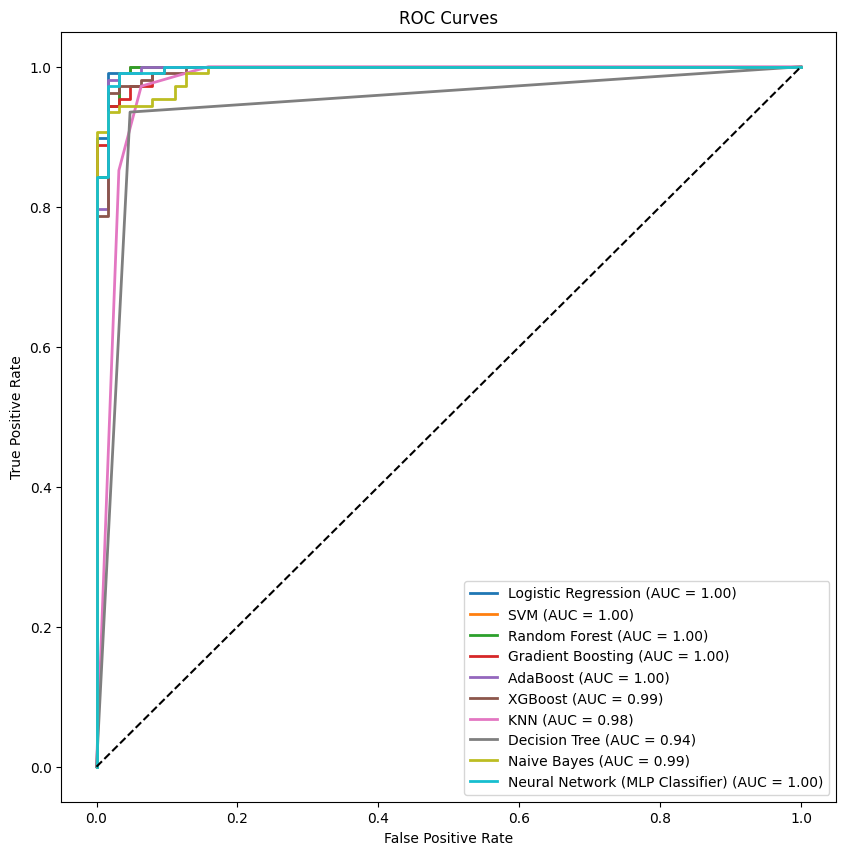

In [93]:
plt.figure(figsize=(10, 10))

def plot_roc(model, X_test, y_test, label):
  y_score = model.predict_proba(X_test)[:, 1] #first column only
  fpr, tpr, _ = roc_curve(y_test, y_score)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, lw=2, label =f'{label} (AUC = {roc_auc:.2f})')

plot_roc(lr_model, X_test, y_test, 'Logistic Regression')
plot_roc(svm_model, X_test, y_test, 'SVM')
plot_roc(rf_model, X_test, y_test, 'Random Forest')
plot_roc(gb_model, X_test, y_test, 'Gradient Boosting')
plot_roc(ab_model, X_test, y_test, 'AdaBoost')
plot_roc(xg_model, X_test, y_test, 'XGBoost')
plot_roc(knn_model, X_test, y_test, 'KNN')
plot_roc(dt_model, X_test, y_test, 'Decision Tree')
plot_roc(nb_model, X_test, y_test, 'Naive Bayes')
plot_roc(nn_model, X_test, y_test, 'Neural Network (MLP Classifier)')

# Plot the diagonal line (random guessing)
plt.plot([0, 1], [0, 1], 'k--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

# Add legends for each model
plt.legend(loc="lower right")

plt.show()


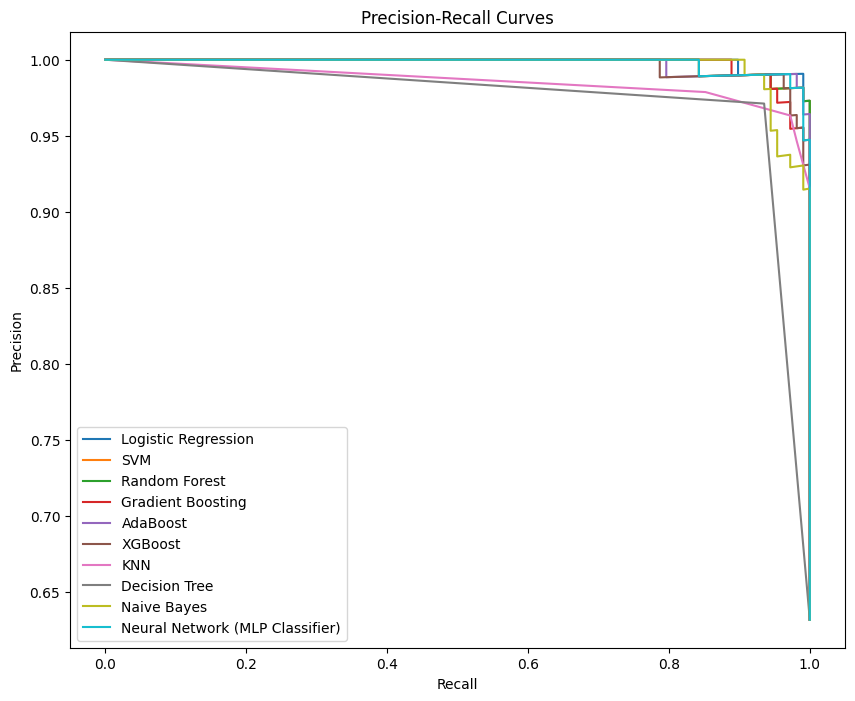

In [94]:
def plot_precision_recall_curve(model, X_test, y_test, model_name):
  if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    plt.plot(recall, precision, label=f'{model_name}')

# Plotting Precision-Recall Curves for all applicable models

plt.figure(figsize=(10, 8))
plot_precision_recall_curve(lr_model, X_test, y_test, 'Logistic Regression')
plot_precision_recall_curve(svm_model, X_test, y_test, 'SVM')
plot_precision_recall_curve(rf_model, X_test, y_test, 'Random Forest')
plot_precision_recall_curve(gb_model, X_test, y_test, 'Gradient Boosting')
plot_precision_recall_curve(ab_model, X_test, y_test, 'AdaBoost')
plot_precision_recall_curve(xg_model, X_test, y_test, 'XGBoost')
plot_precision_recall_curve(knn_model, X_test, y_test, 'KNN')
plot_precision_recall_curve(dt_model, X_test, y_test, 'Decision Tree')
plot_precision_recall_curve(nb_model, X_test, y_test, 'Naive Bayes')
plot_precision_recall_curve(nn_model, X_test, y_test, 'Neural Network (MLP Classifier)')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.show()
